In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation,Layer,Lambda
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("D:\\Data Science\\Assignments\\Assignment 16 (Neural Networks)\\gas_turbines.csv")
df1=df.copy()

In [3]:
df1.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df1.value_counts()

AT       AP      AH      AFDP    GTEP    TIT     TAT     TEY     CDP     CO        NOX    
0.5223   1005.2  82.567  3.8504  20.314  1028.6  528.15  113.82  10.651  11.62700  100.120    1
21.9700  1013.4  90.491  3.7780  25.315  1090.6  550.24  133.81  12.130  0.88213   61.486     1
21.9500  1006.6  98.916  3.8226  24.822  1087.2  550.25  131.73  11.983  1.02890   57.825     1
21.9510  1015.3  95.978  3.5781  19.768  1057.1  549.86  109.83  10.475  5.32560   54.436     1
21.9530  1013.1  92.079  3.2656  21.138  1066.1  549.92  116.70  10.875  1.59050   53.454     1
                                                                                             ..
13.6150  1016.4  95.714  4.4170  24.088  1084.7  550.16  132.57  11.863  1.52420   72.780     1
13.6170  1013.8  90.408  3.8901  21.650  1069.0  549.86  121.00  11.112  3.81930   71.042     1
13.6200  1008.8  69.582  4.4356  24.236  1085.8  550.34  133.32  11.905  0.81195   74.920     1
13.6210  1017.4  84.170  4.0292  24.034  1086

In [5]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


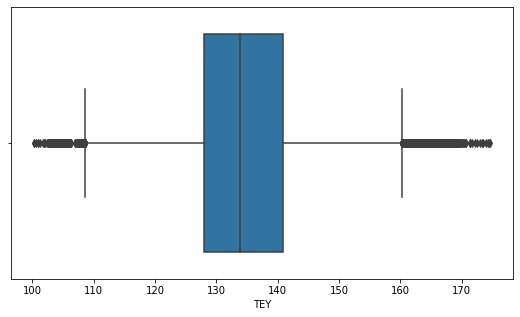

In [10]:
ax = sns.boxplot(df1['TEY'])

In [11]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.14596270190452942
Kurtosis: -0.4870582497451621


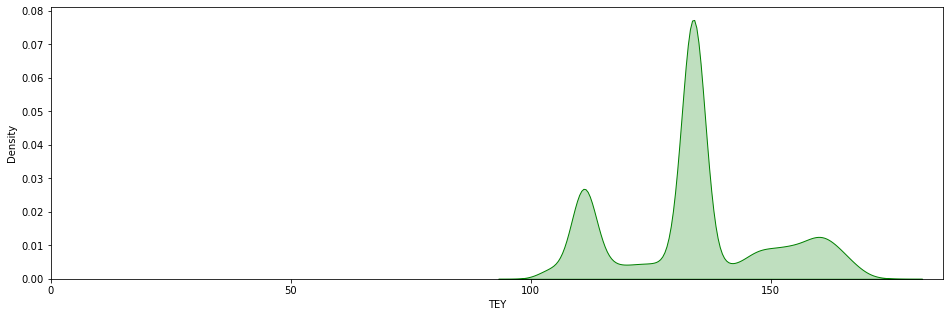

In [14]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['TEY'].skew()))
print("Kurtosis: {}".format(df1['TEY'].kurtosis()))
ax = sns.kdeplot(df1['TEY'],shade=True,color='g')
plt.xticks([i for i in range(0,180,50)])
plt.show()

In [15]:
dfa = df1[df1.columns[0:10]]
TEY_column = dfa.select_dtypes(include='object').columns.tolist()

In [17]:
plt.figure(figsize=(16,10))
for i,col in enumerate(TEY_column,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

<Figure size 1152x720 with 0 Axes>

In [18]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

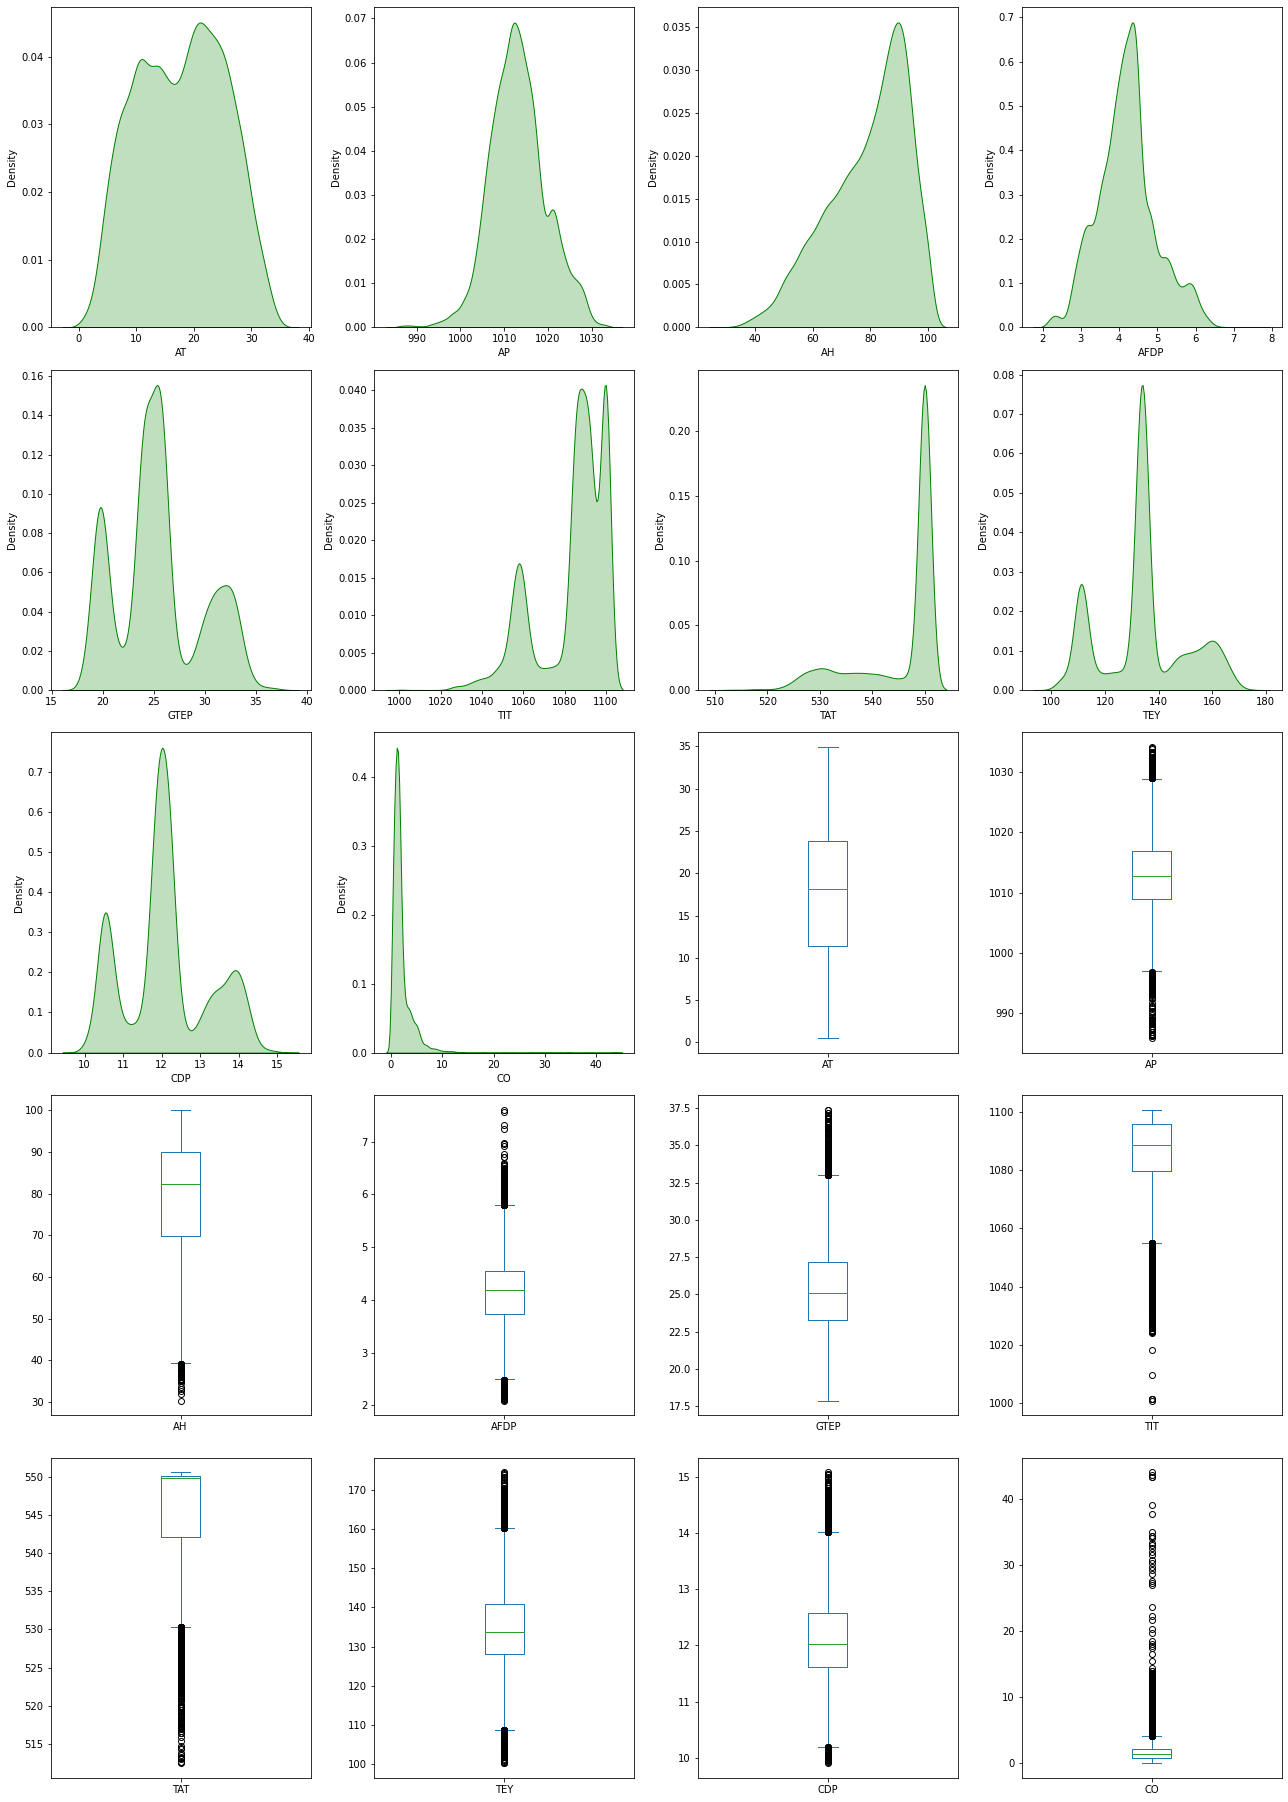

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
skewness,-0.030710,0.107601,-0.681224,0.315150,0.370987,-1.133744,-1.485524,0.145963,0.263042,6.534577
kurtosis,-0.987597,0.424070,-0.282476,0.281642,-0.618358,0.375232,0.847637,-0.487058,-0.589420,82.518116


In [19]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [20]:
corr = df1[df1.columns[0:10]].corr()

<AxesSubplot:>

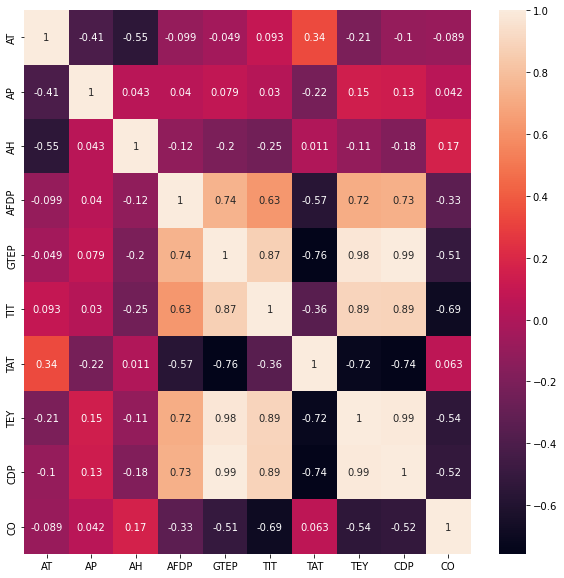

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [22]:
mapping = {'small': 1, 'large': 2}

In [23]:
df1 = df1.replace(mapping)

In [44]:
X = np.array(df1.iloc[:,0:8])
y = np.array(df1.iloc[:,8])

In [45]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [46]:
X_norm = norm_func(X)

In [47]:
# Create Model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu')) #1st layer
model.add(Dense(8, activation='relu')) #2nd layer
model.add(Dense(1, activation='sigmoid')) #3rd layer or top layer

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [50]:
history=model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1209385746432.0000 - accuracy: 0.0000e+00 - val_loss: -1201874665472.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1232576708608.0000 - accuracy: 0.0000e+00 - val_loss: -1224847523840.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1256056553472.0000 - accuracy: 0.0000e+00 - val_loss: -1248106250240.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1279833800704.0000 - accuracy: 0.0000e+00 - val_loss: -1271654383616.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1303901896704.0000 - accuracy: 0.0000e+00 - val_loss: -1295495200768.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 5s 5ms/step - loss: -1328270278656.0000 - accura

1008/1008 [==============================] - 5s 5ms/step - loss: -4680647180288.0000 - accuracy: 0.0000e+00 - val_loss: -4635439923200.0000 - val_accuracy: 0.0000e+00
Epoch 92/150
1008/1008 [==============================] - 4s 4ms/step - loss: -4737421803520.0000 - accuracy: 0.0000e+00 - val_loss: -4691564953600.0000 - val_accuracy: 0.0000e+00
Epoch 93/150
1008/1008 [==============================] - 4s 4ms/step - loss: -4794661994496.0000 - accuracy: 0.0000e+00 - val_loss: -4748117803008.0000 - val_accuracy: 0.0000e+00
Epoch 94/150
1008/1008 [==============================] - 5s 5ms/step - loss: -4852337344512.0000 - accuracy: 0.0000e+00 - val_loss: -4805111054336.0000 - val_accuracy: 0.0000e+00
Epoch 95/150
1008/1008 [==============================] - 5s 5ms/step - loss: -4910450475008.0000 - accuracy: 0.0000e+00 - val_loss: -4862568300544.0000 - val_accuracy: 0.0000e+00
Epoch 96/150
1008/1008 [==============================] - 5s 5ms/step - loss: -4969080553472.0000 - accuracy: 0.0

In [51]:
# Evaluate the model
scores=model.evaluate(X,y)
print(scores)
print('%s: %.2f%%' %(model.metrics_names[1],scores[1]*100))

470/470 [==============================] - 1s 3ms/step - loss: -8866904408064.0000 - accuracy: 0.0000e+00
[-8866904408064.0, 0.0]
accuracy: 0.00%


In [52]:
# Visualize training history

# List all data in history
model.history.history.keys()

dict_keys([])

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

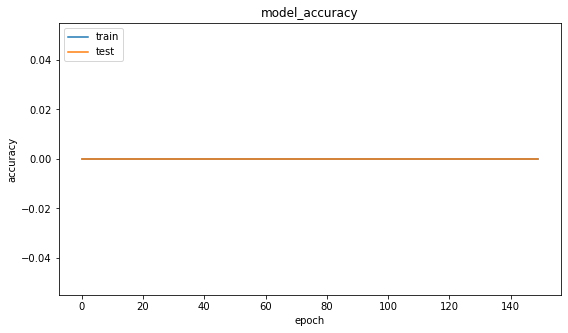

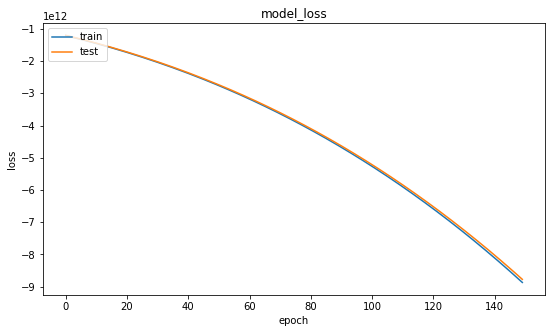

In [54]:
# Summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()